In [2]:
import variables as exp
#import control
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
plt.rcParams['animation.ffmpeg_path'] = '/usr/local/bin/ffmpeg'
import matplotlib.animation as animation
from pydmd import DMD
from pydmd import DMDc


np.set_printoptions(precision=5, suppress=True)
plt.style.use('bmh')
figsize = (12, 5)
dpi = 600    # Resolution in dots per inch

[[-5.80622025e-03 -1.23658058e-19]]


# Application of Dynamic Mode Decomposition (DMD), DMD with Control (DMDc) and Extended DMDc (EDMDc)

Here we will be running a simple setup of DMD, DMDc, EDMD and EDMDc on a simple pendulum setup. This will be the base environment we will be using for determining the effacicy of using DMD to approximate the Koopman Operator for this simple mechanical system

In [3]:
#Elis Island
m = exp.m
g = exp.g
l = exp.l
t_span = exp.t_span
b = exp.b
x0 = exp.x0
#x0=np.array([np.pi/4.0, 0.0])
xf = exp.xf
#xf = np.matrix([xf])
x_dt=np.array([0., 0.])
K = exp.K
#K = np.matrix([K])
print(K)
duration = int(exp.duration)
def f(xk,t):
    x_1 = xk[1]
    x_2 = -b/m * xk[1] - g/l * np.sin(xk[0])
    ctrl = 1/(m*l**2) * u(xk)
    #print(ctrl)
    return [x_1, x_2+ctrl]


[1.6902, 3.6785]


In [4]:
u = lambda x: 0
#Uncontrol Simulation
y0 = odeint(f,x0,t_span)
y = int(len(y0))
ctrl1 = np.zeros((2,y))

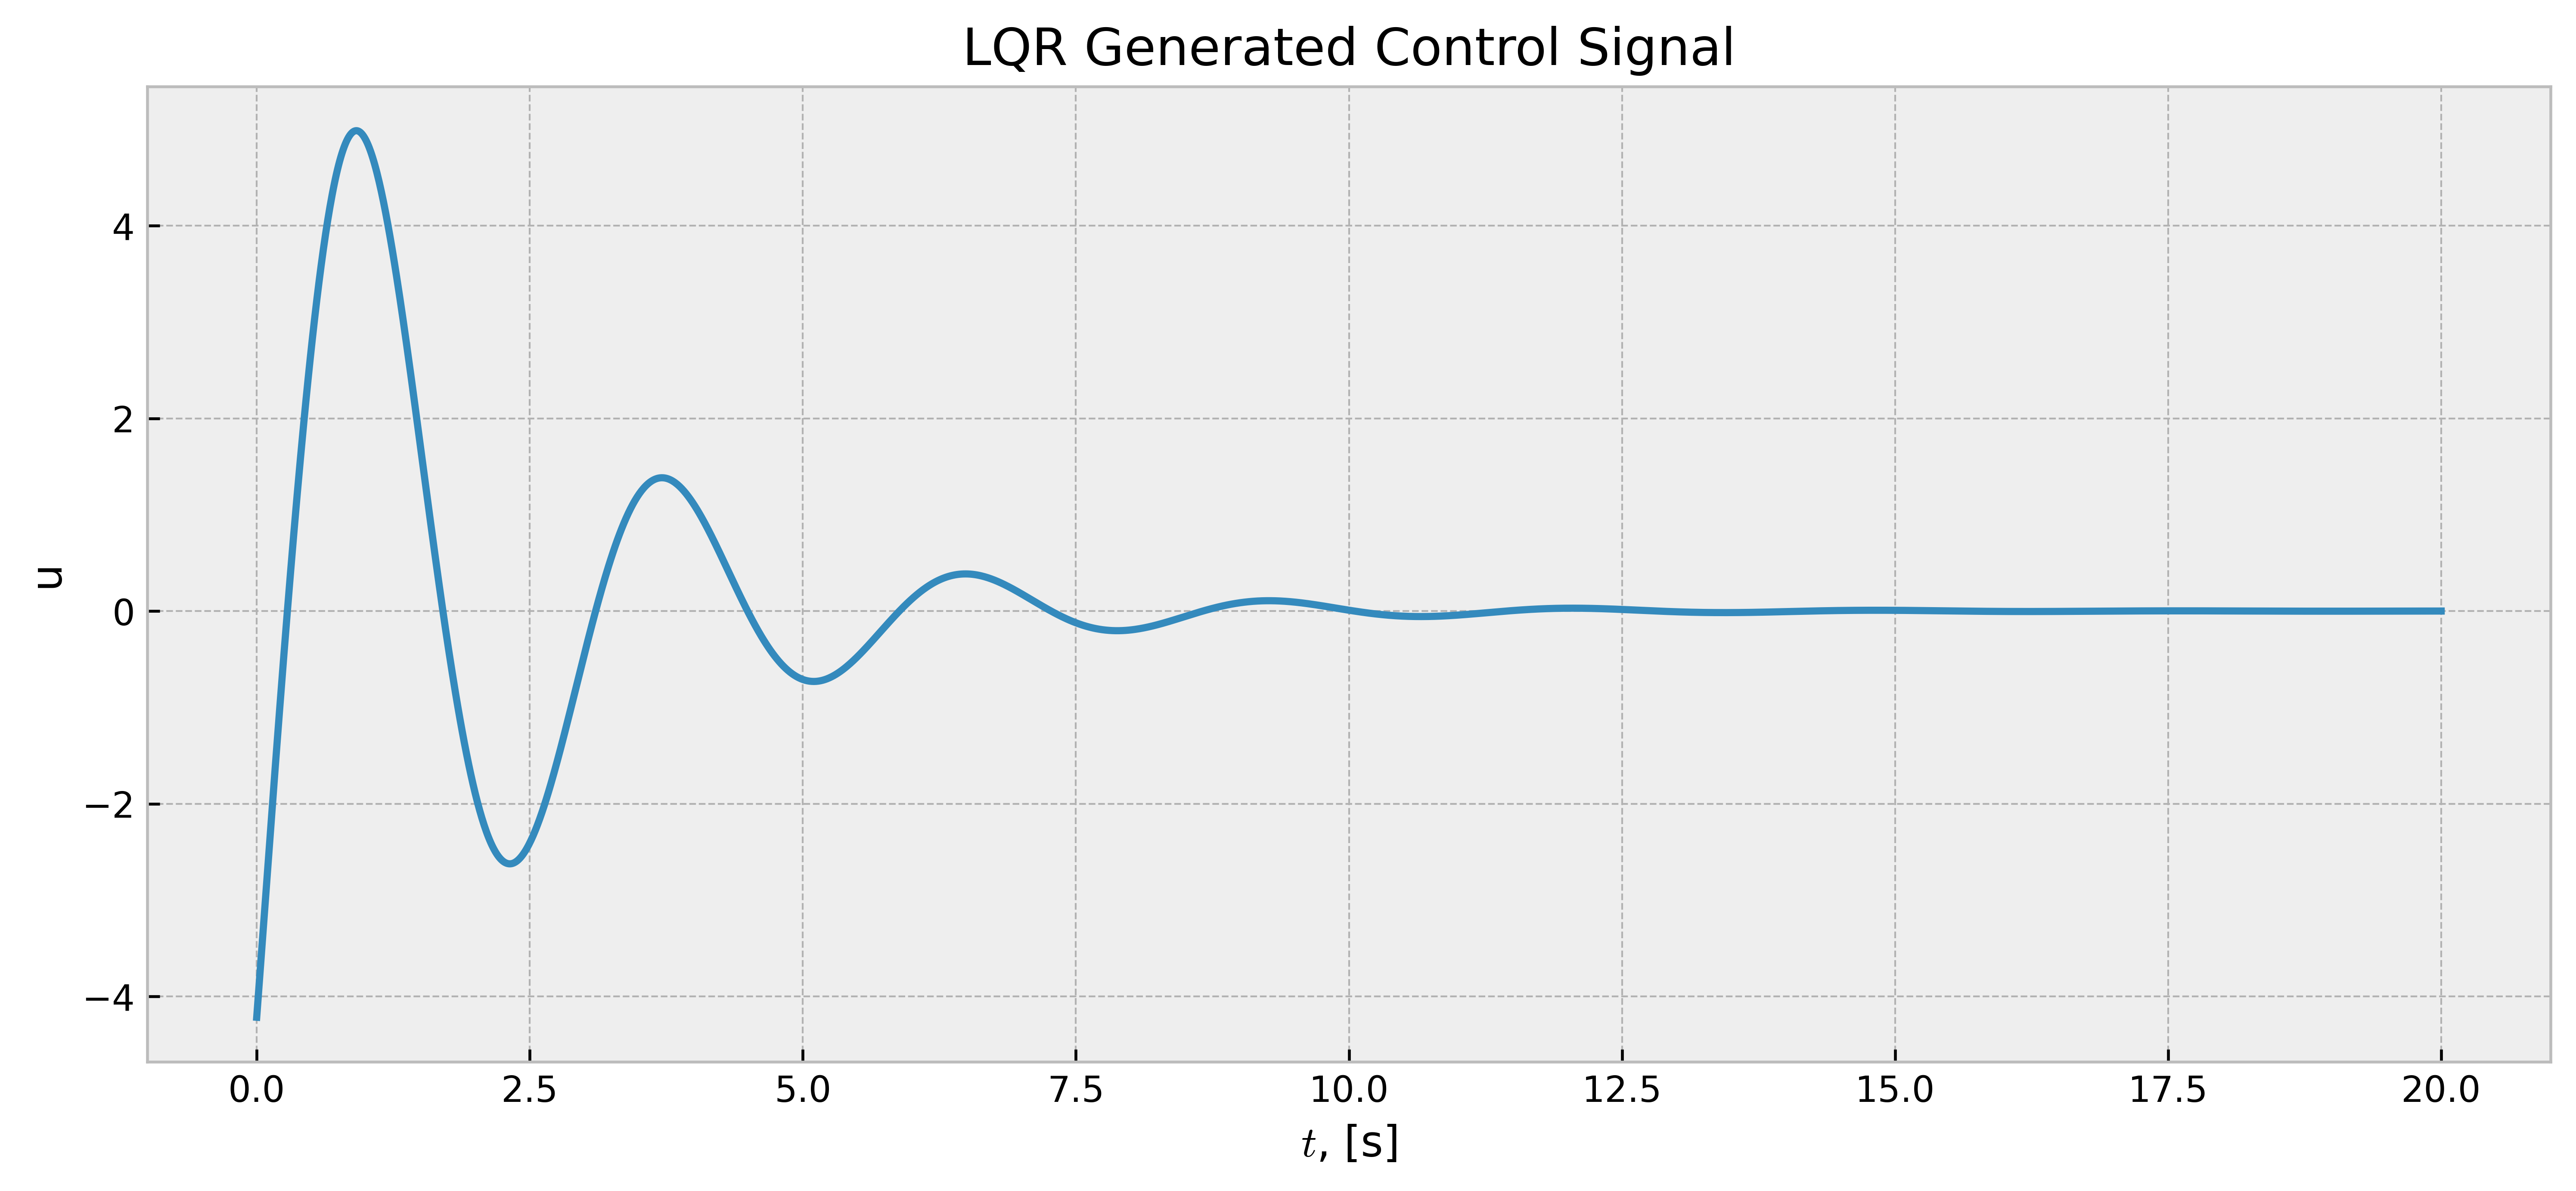

In [5]:
#Control Implementation
u = lambda x: -np.matmul(K, (x - xf))
y1 = odeint(f, x0, t_span)
y = int(len(y1))
ctrl2 = np.zeros((y))
yt = y1.T
for i in range(y):
    ynow = yt[:,i]
    ctrl2[i] = -np.matmul(K,(ynow-xf))
plt.figure(figsize=figsize, dpi=dpi)
plt.title("LQR Generated Control Signal")
plt.plot(t_span,ctrl2[:])
plt.xlabel(r"$t$, [s]")
plt.ylabel(r"u")
plt.show()#This is supposed to be the same thing but IDK, I cannot get it to work in any reasonable way...
#y2 = solve_ivp(f, [0, duration],[np.pi/4 , 0.], t_eval = np.linspace(0,10,1000) )

In [6]:
#DMDc Time
dmd1c = DMDc(svd_rank = 2)
yuc = y0.T
dmd1c.fit(yuc,ctrl1)
s1, s2 = np.vsplit(dmd1c.reconstructed_data(),2)
s1 = s1.T
s2 = s2.T
plt.figure(figsize=figsize, dpi=dpi)
plt.title("Reconstructed Angular position and rate")
plt.plot(t_span,s1,'b-',label = r' Reconstruct $\theta$ - [Rad]')
plt.plot(t_span,s2,'r-',label = r' Reconstruct$\dot{\theta}$ - [Rad/s]')
plt.plot(t_span,y0[:,0],'g--',label = r' Original $\theta$ - [Rad]')
plt.plot(t_span,y0[:,1],'k--',label = r' Original $\dot{\theta}$ - [Rad/s]')
plt.xlabel(r"$t$, [s]")
plt.ylabel(r"State")
plt.legend(loc='best')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'y'

In [ ]:
#DMDc on Controlled States

#DMD Time
dmd2c = DMDc(svd_rank=2)
dmd2c.fit(y1.T,ctrl2)
for eig in dmd2c.eigs:
    print('Eigenvalue {}: distance from unit circle {}'.format(eig, np.abs(eig.imag**2+eig.real**2 - 1)))

dmd2c.plot_eigs(show_axes=True, show_unit_circle=True)

s21, s22 = np.vsplit(dmd2c.reconstructed_data.real,2)
s21 = s21.T
s22 = s22.T

plt.figure(figsize=figsize, dpi=dpi)
plt.title("Reconstructed Angular position and rate")
plt.plot(t_span,s21,'b-',label = r' Reconstruct $\theta$ - [Rad]')
plt.plot(t_span,s22,'r-',label = r' Reconstruct$\dot{\theta}$ - [Rad/s]')
plt.plot(t_span,y1[:,0],'g--',label = r' Original $\theta$ - [Rad]')
plt.plot(t_span,y1[:,1],'k--',label = r' Original $\dot{\theta}$ - [Rad/s]')
plt.xlabel(r"$t$, [s]")
plt.ylabel(r"State")
plt.legend(loc='best')
plt.show()
